# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

## 0) Setup

Import pandas **with the correct name** and set `matplotlib` to always display graphics in the notebook.

In [1]:
import pandas as pd
%matplotlib inline


## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the "correct" name. You will use `read_excel` instead of `read_csv`, *but you'll also need to install a new library*.

In [2]:
df = pd.read_excel("richpeople copy.xlsx")


## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [3]:
df.shape
# number of rows and columns


(1653, 30)

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [4]:
# print(df.dtypes)
df.sort_values(by="networthusbillion", ascending = False)[:10]


,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
184,2014,Bill Gates,1,United States,USA,76.0,self-made,founder non-finance,male,58.0,...,founder,1975.0,NaN,Microsoft,NaN,NaN,http://www.forbes.com/profile/bill-gates/,NaN,NaN,NaN
226,2014,Carlos Slim Helu,2,Mexico,MEX,72.0,self-made,privatized and resources,male,74.0,...,founder,1990.0,NaN,telecom,NaN,NaN,http://www.ozy.com/provocateurs/carlos-slims-w...,NaN,NaN,NaN
79,2014,Amancio Ortega,3,Spain,ESP,64.0,self-made,founder non-finance,male,77.0,...,founder,1975.0,NaN,retail,NaN,NaN,http://www.forbes.com/profile/amancio-ortega/,NaN,NaN,NaN
1562,2014,Warren Buffett,4,United States,USA,58.2,self-made,founder non-finance,male,83.0,...,founder,1839.0,NaN,Berkshire Hathaway,NaN,NaN,http://www.forbes.com/lists/2009/10/billionair...,http://www.forbes.com/companies/berkshire-hath...,NaN,NaN
862,2014,Larry Ellison,5,United States,USA,48.0,self-made,founder non-finance,male,69.0,...,founder,1977.0,NaN,Oracle,NaN,NaN,http://www.forbes.com/profile/larry-ellison/,http://www.businessinsider.com/how-larry-ellis...,NaN,NaN
339,2014,David Koch,6,United States,USA,40.0,inherited,inherited,male,73.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
247,2014,Charles Koch,6,United States,USA,40.0,inherited,inherited,male,78.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
1364,2014,Sheldon Adelson,8,United States,USA,38.0,self-made,self-made finance,male,80.0,...,founder,1952.0,NaN,casinos,NaN,NaN,http://www.forbes.com/profile/sheldon-adelson/,http://lasvegassun.com/news/1996/nov/26/rat-pa...,NaN,NaN
280,2014,Christy Walton,9,United States,USA,36.7,inherited,inherited,female,59.0,...,relation,1962.0,NaN,Wal-Mart,widow,NaN,http://www.forbes.com/profile/christy-walton/,NaN,NaN,NaN
724,2014,Jim Walton,10,United States,USA,34.7,inherited,inherited,male,66.0,...,relation,1962.0,NaN,Wal-Mart,inherited from father,NaN,http://www.forbes.com/profile/jim-walton/,NaN,NaN,NaN


## 4) How many male billionaires are there compared to the number of female billionares? Do they have a different average wealth?

> **TIP:** The second part uses `groupby`, but the first part does not.

In [5]:
# print(df['gender'].value_counts())
print("The number of male billionaires is",df[df['gender'] == 'male'].shape[0])
print("The number of female billionaires is",df[df['gender'] == 'female'].shape[0])

networthusbillion_mean = df.groupby('gender')['networthusbillion'].mean()
male_avg_wealth   = networthusbillion_mean['male']
female_avg_wealth = networthusbillion_mean['female']
print("The average wealth of male billionaires is", round(  male_avg_wealth, 2  ) )
print("And the average wealth of female billionaires is", round(  female_avg_wealth, 2  ) )

if male_avg_wealth == female_avg_wealth :
    print("The average wealth of the male billionaires and the female billionaires are same.")
else :
    print("The average wealth of the male billionaires and the female billionaires are different.")
    

The number of male billionaires is 1473
The number of female billionaires is 180
The average wealth of male billionaires is 3.9
And the average wealth of female billionaires is 3.92
The average wealth of the male billionaires and the female billionaires are different.


## 5) Who is the poorest billionaire? Who are the top 10 poorest billionaires?

In [17]:
df_sorted = df.sort_values(by="networthusbillion", ascending = True)
df_sorted = df_sorted.reset_index()

print("The poorest billionaire is", df_sorted.loc[0,'name'])
print( df_sorted['name'].head(10) )

The poorest billionaire is B.R. Shetty
0          B.R. Shetty
1         Rostam Azizi
2           Tory Burch
3           Fred Chang
4       Angela Bennett
5              Fu Kwan
6       Ryan Kavanaugh
7    O. Francis Biondi
8         Lam Fong Ngo
9        Feng Hailiang
Name: name, dtype: object


## 6) What is the most common source of wealth? Is it different between males and females?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together???

In [43]:
df_sorted_wealth = df['sourceofwealth'].value_counts()
print("The most common source of wealth is", df_sorted_wealth.index[0] )

df_sorted_wealth_f = df[df['gender'] == 'female']['sourceofwealth'].value_counts()
print("The most common source of wealth of female billionaire is", df_sorted_wealth_f.index[0])

df_sorted_wealth_m = df[df['gender'] == 'male']['sourceofwealth'].value_counts()
print("The most common source of wealth of male billionaire is", df_sorted_wealth_m.index[0])

if df_sorted_wealth_f.index[0] == df_sorted_wealth_m.index[0] :
    print("The most common source of wealth of males and of females are the same.")
else :
    print("The most common source of wealth of males and of females are different.")

The most common source of wealth is real estate
The most common source of wealth of female billionaire is diversified
The most common source of wealth of male billionaire is real estate
The most common source of wealth of males and of females are different.


## 7) What companies have the most billionaires? Graph the top 5 as a horizontal bar graph.

> **TIP:** First find the answer to the question, then just try to throw `.plot()` on the end
>
> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like oyu should use `groupby`, but don't! There's an easier way to count.

The company with the most billionaires is Hyatt


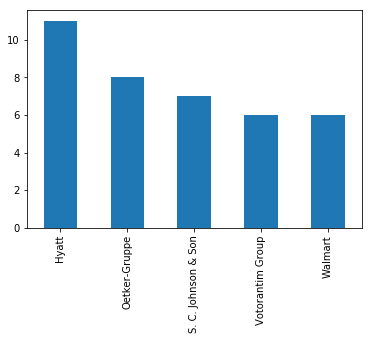

In [47]:
# print(df.dtypes)
df_sorted_company = df['company'].value_counts()
print("The company with the most billionaires is", df_sorted_company.index[0])
df['company'].value_counts().head(5).plot(kind='bar')

## 8) How much money do these billionaires have in total?

In [48]:
print("The total wealth of the billionaires is", df["networthusbillion"].sum(), "billions.")


The total wealth of the billionaires is 6454.4 billions.


## 9) What are the top 3 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is total amount of money per country.

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," and "I want to add it all up." Just chain them all together.

In [49]:
# print(df.dtypes)
df['citizenship'].value_counts().head(3)



United States    499
China            152
Russia           111
Name: citizenship, dtype: int64

## 10) How old is an average billionaire? How old are billionaires self made vs. non self made? 

In [58]:
print("The average age of the billionaire is", round(df['age'].mean(), 2 ))
self_age_inherit = round( df.groupby('selfmade')['age'].mean()['inherited'], 2)
self_age_slef    = round( df.groupby('selfmade')['age'].mean()['self-made'], 2)
print("The average age of the billionaire self made is", self_age_inherit, "and the average age of the billionaire non self made is", self_age_slef)


The average age of the billionaire is 63.34
The average age of the billionaire self made is 64.96 and the average age of the billionaire non self made is 62.63


64.962184873949582

## 11) Who are the youngest billionaires? Who are the oldest? Make a graph of the distribution of ages.

The youngest billionaire is Perenna Kei
The oldest billionaire is David Rockefeller, Sr.


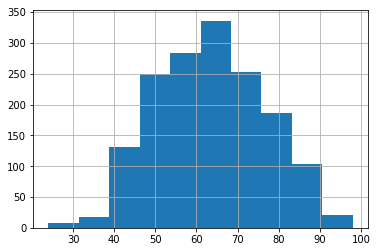

In [69]:
df_sorted_young = df.sort_values(by="age", ascending = True)
df_sorted_young = df_sorted_young.reset_index()

print("The youngest billionaire is", df_sorted_young.loc[0, 'name'])

df_sorted_old = df.sort_values(by="age", ascending = False)
df_sorted_old = df_sorted_old.reset_index()

print("The oldest billionaire is", df_sorted_old.loc[0, 'name'])

df['age'].hist()

## 12) Make a scatterplot of their net worth compared to their age

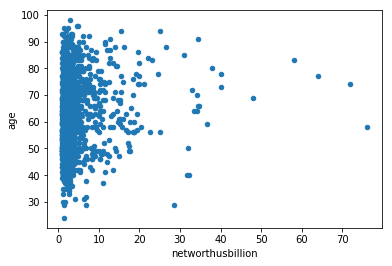

In [70]:
df.plot(kind='scatter', x='networthusbillion', y='age')

## 13) Make a bar graph of the top 10 richest billionaires

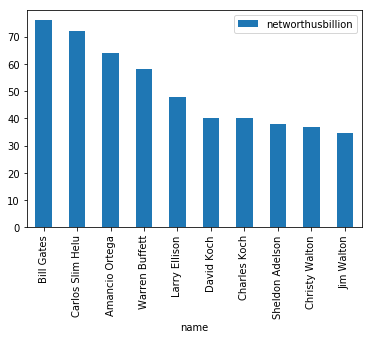

In [71]:
df.sort_values(by="networthusbillion", ascending = False)[:10].plot(kind='bar', x= 'name', y = 'networthusbillion')
